# Object Detecion using YOLOv8 model

### Importing required packages

In [7]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image

### Load the pre-trained model

In [5]:
# Load a COCO-pretrained YOLOv8n model
model = YOLO('yolov8n.pt')

# Display model information (optional)
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

### Train the model on the COCO8 example dataset

In [3]:
# Train the model on the COCO8 example dataset for 100 epochs
# results = model.train(data='coco8.yaml', epochs=100, imgsz=640)

### Testing with sample images

In [8]:
results = model('frame_0018.png')

# Visualize the results and save them to disk
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Save results to disk using standard PIL functions
    im_rgb.save(f'results2.jpg')

    # Show results to screen (in supported environments)
    im_rgb.show()


image 1/1 e:\Masters\Spring 2024\CSCI 6527\Image Detection\frame_0018.png: 384x640 15 persons, 89.5ms
Speed: 1.0ms preprocess, 89.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


### Function to convert video to individual frames

In [4]:
def video2img(video_path):
    # Output directory for frames
    output_frames_dir = 'cnvt_frames'

    # Create output directory if it doesn't exist
    os.makedirs(output_frames_dir, exist_ok=True)

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the frames per second (fps) of the video
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Loop through all frames in the video
    for frame_number in range(total_frames):
        # Read the frame
        ret, frame = cap.read()

        # Save the frame as an image
        frame_filename = f"{output_frames_dir}/frame_{frame_number:04d}.png"
        cv2.imwrite(frame_filename, frame)

    # Release the video capture object
    cap.release()

    print(f"Frames extracted successfully. Total frames: {total_frames}, FPS: {fps}")

### Function for object detection system

In [12]:
def count_vehicles(folder_path):
    # List to store results for each image
    all_results = []
    imagename = []
    all_detections = []
    numbers_to_count = [1, 2, 3, 5, 7]  # label containing type of vehicle to count
    all_counts = []

    # Iterate through files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
            # Full path to the image
            image_path = os.path.join(folder_path, filename)
            imagename.append(filename)

            # Run the model on the image
            results = model([image_path])

            # Append the results to the list
            all_results.extend(results)
    
    for result in all_results:
        boxes = result.boxes  # Boxes object for bounding box outputs
        detection = boxes.cls.tolist()
        all_detections.append(detection)
    
    for detection in all_detections:
        count = 0
        for num in detection:
            if num in numbers_to_count:
                count += 1
        all_counts.append(count)

    df = pd.DataFrame({'ImageName': imagename, 'Number of vehicles': all_counts})

    plt.bar(df['ImageName'], df['Number of vehicles'])
    plt.xlabel('Images')
    plt.ylabel('Number of vehicles')
    plt.title('Bar graph showing number of vehicles in a series of images')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()

    # Convert 'ImageName' to strings
    df['ImageName'] = df['ImageName'].astype(str)

    # Plot a line chart
    plt.plot( df['Number of vehicles'], marker='.')
    plt.xlabel('Images')
    plt.ylabel('Number of vehicles')
    plt.title('Line chart showing number of vehicles in a series of images')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()



##### function to check whether input is bunch of images or video

In [6]:
def fileType(folder_path):
   for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
           count_vehicles(folder_path)
           break
        
        elif filename.endswith(".mp4"):  # Adjust file extensions as needed
            # Full path to the video
            video_path = os.path.join(folder_path, filename)

            # Convert the video to frames
            video2img(video_path)

            count_vehicles('cnvt_frames')
            break


### Call the function

##### Output for a traffic images


0: 384x640 2 persons, 5 cars, 103.5ms
Speed: 1.3ms preprocess, 103.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 101.6ms
Speed: 1.0ms preprocess, 101.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 103.2ms
Speed: 1.0ms preprocess, 103.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 3 cars, 1 bus, 99.1ms
Speed: 1.0ms preprocess, 99.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 106.9ms
Speed: 1.0ms preprocess, 106.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 3 cars, 108.4ms
Speed: 1.0ms preprocess, 108.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 3 cars, 94.2ms
Speed: 1.0ms preprocess, 94.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 4 cars, 98.5ms
Speed: 1.0ms preprocess, 98.5ms infe

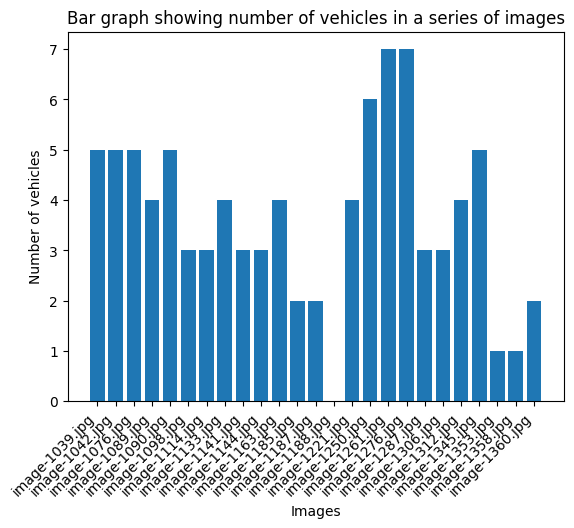

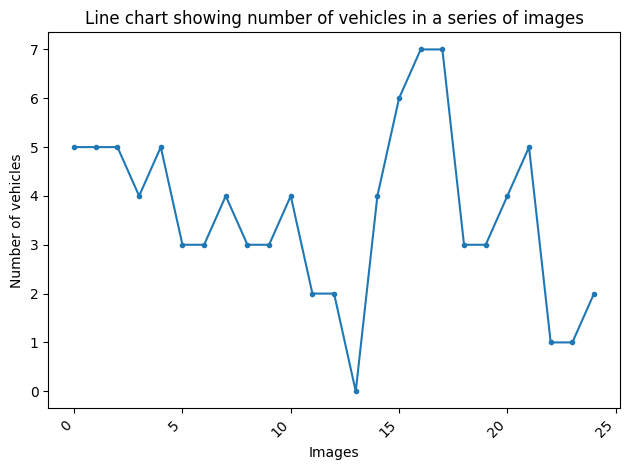

In [59]:
folder_path = "sample_traffic"
df = fileType(folder_path)
 

##### Output for a traffic video

Frames extracted successfully. Total frames: 360, FPS: 29.97002997002997

0: 384x640 9 cars, 2 trucks, 109.8ms
Speed: 2.9ms preprocess, 109.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 4 trucks, 113.0ms
Speed: 1.0ms preprocess, 113.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9 cars, 3 trucks, 121.0ms
Speed: 1.0ms preprocess, 121.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10 cars, 3 trucks, 104.0ms
Speed: 2.0ms preprocess, 104.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11 cars, 4 trucks, 96.9ms
Speed: 2.0ms preprocess, 96.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12 cars, 5 trucks, 82.9ms
Speed: 2.0ms preprocess, 82.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 cars, 5 trucks, 91.0ms
Speed: 1.0ms preprocess, 91.0ms in

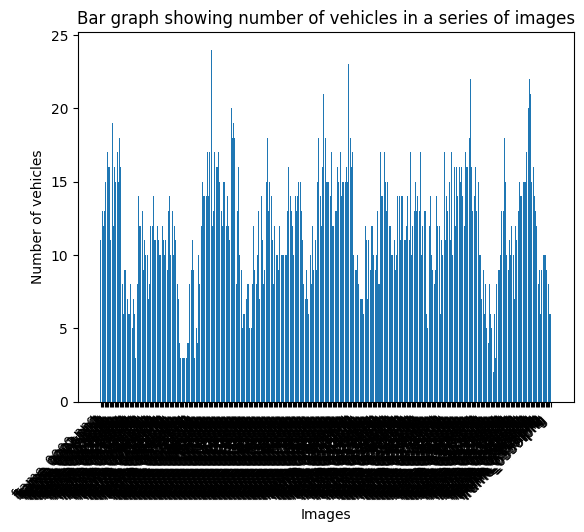

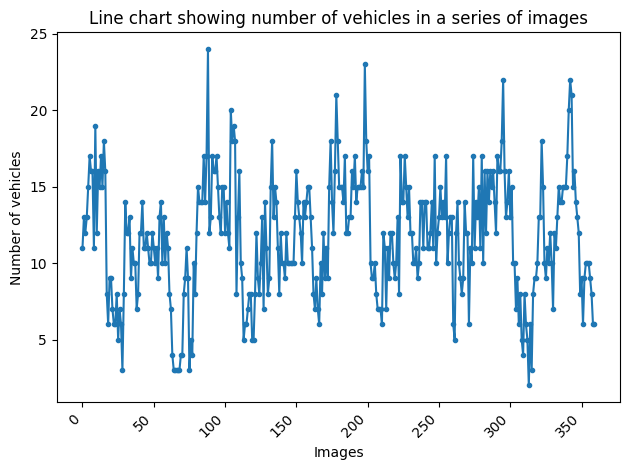

In [60]:
folder_path = "stockvideo"
df = fileType(folder_path)

##### Output for another case of counting people from images using the same system


0: 384x640 16 persons, 128.5ms
Speed: 2.0ms preprocess, 128.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 84.5ms
Speed: 2.0ms preprocess, 84.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 traffic light, 2 backpacks, 84.5ms
Speed: 1.0ms preprocess, 84.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 79.5ms
Speed: 1.0ms preprocess, 79.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 persons, 83.5ms
Speed: 1.0ms preprocess, 83.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 cell phone, 85.5ms
Speed: 1.0ms preprocess, 85.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 97.5ms
Speed: 2.0ms preprocess, 97.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 persons, 88.5ms
Speed: 1.0ms preprocess, 88

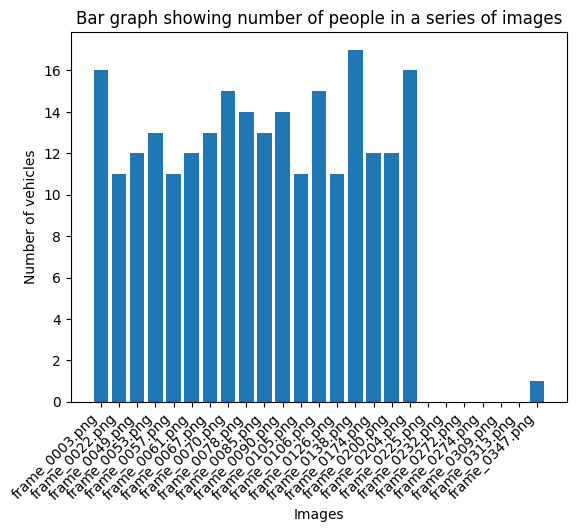

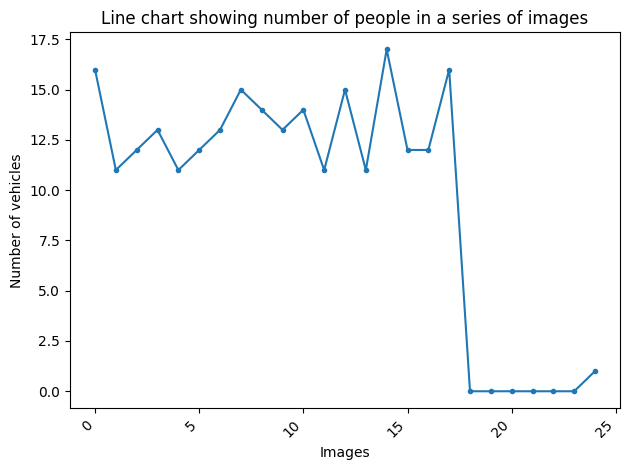

In [13]:
folder_path = "sample people"
df = fileType(folder_path)